In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_names = ["data_without_fault.xlsx", "data_with_fault1.xlsx", "data_with_fault2.xlsx", "data_with_fault3.xlsx", "data_with_fault4.xlsx"]
dataframes = [pd.read_excel(file) for file in file_names]
merged_df = pd.concat(dataframes, axis=0)
merged_df.reset_index(drop=True, inplace=True)
labels = ["NoFault", "Fault1", "Fault2", "Fault3", "Fault4"]
label_column = []
for label in labels:
    label_column.extend([label] * (len(merged_df) // len(labels)))
merged_df["Label"] = label_column
pd.set_option('display.max_rows', None)
merged_df

,Average Current(A),Average Voltage(V),Average Electrical Power(kw),Average Heat Power(kw),T_stack(°C),P_stack(kPa),Label
0,151.440910,378.602275,57.122000,19.315554,40.000,0.000,NoFault
1,150.940910,377.352275,56.622000,19.465554,40.000,6.364,NoFault
2,150.690910,376.727275,56.422000,19.585554,40.000,12.727,NoFault
3,150.490910,376.227275,56.122000,19.655554,40.000,19.091,NoFault
4,150.090910,375.227275,55.922000,19.725554,40.000,25.455,NoFault
5,149.890910,374.727275,55.722000,19.795554,40.000,31.818,NoFault
6,149.690910,374.227275,55.622000,19.815554,40.000,38.182,NoFault
7,149.290910,373.227275,55.553000,19.865554,40.000,44.545,NoFault
8,148.990910,372.477275,55.453000,19.905554,40.000,50.909,NoFault
9,148.890910,372.227275,55.393017,19.935554,40.000,57.273,NoFault


In [3]:
X = merged_df[['Average Current(A)', 'Average Voltage(V)', 'Average Electrical Power(kw)', 'Average Heat Power(kw)', 'T_stack(°C)', 'P_stack(kPa)']]
y = merged_df['Label']

encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0],
}

In [5]:
# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV((XGBClassifier(random_state=42)), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

[09:21:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "clf__colsample_bytree", "clf__learning_rate", "clf__max_depth", "clf__n_estimators", "clf__subsample" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'clf__colsample_bytree': [0.8, 1.0],
                         'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 5, 7, 9],
                         'clf__n_estimators': [50, 100, 200],
                         'clf__subsample': [0.8, 1.0]})

In [6]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters:  {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50, 'clf__subsample': 0.8}
Best Accuracy: 100.00%
Test Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144
 samples avg       1.00      1.00      1.00       144



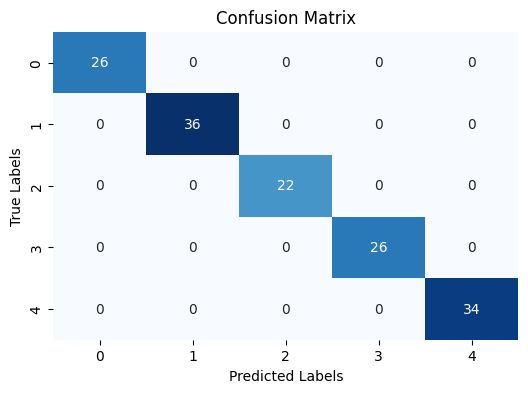

In [15]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()